In [66]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import seaborn as sns # For plotting
import matplotlib.pyplot as plt # For showing plots
import numpy as np

In [44]:
df = pd.read_csv('Permanent_Crop_NUTS2.csv', sep=",")
df.head(200)

,NutsID,year,area,permanent_crop_ID,crop_name,region_name,region_level
0,11,1989,223736,33,Total,Norte,NUTS2
1,11,1999,228323,34,Total,Norte,NUTS2
2,11,2009,218545,35,Total,Norte,NUTS2
3,11,2019,255954,36,Total,Norte,NUTS2
4,11,1989,10696,37,Fresh fruit plantations (excluding citrus plan...,Norte,NUTS2
...,...,...,...,...,...,...,...
195,30,2019,2322,107780,Total,Região Autónoma da Madeira,NUTS2
196,30,1989,261,107781,Fresh fruit plantations (excluding citrus plan...,Região Autónoma da Madeira,NUTS2
197,30,1999,219,107782,Fresh fruit plantations (excluding citrus plan...,Região Autónoma da Madeira,NUTS2
198,30,2009,278,107783,Fresh fruit plantations (excluding citrus plan...,Região Autónoma da Madeira,NUTS2


In [67]:
# Fit the ANOVA model
formula = 'area ~ C(year) + C(crop_name) + C(region_name)'
model = ols(formula, df).fit()

# Perform ANOVA
anova_table = anova_lm(model, typ=2)

print(anova_table)

                      sum_sq     df          F        PR(>F)
C(year)         1.292763e+09    3.0   0.260971  8.534525e-01
C(crop_name)    2.708826e+11    7.0  23.435702  2.676990e-23
C(region_name)  1.566875e+11    6.0  15.815314  6.201889e-15
Residual        3.418027e+11  207.0        NaN           NaN


c:\Users\cespe\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cespe\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cespe\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cespe\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and w

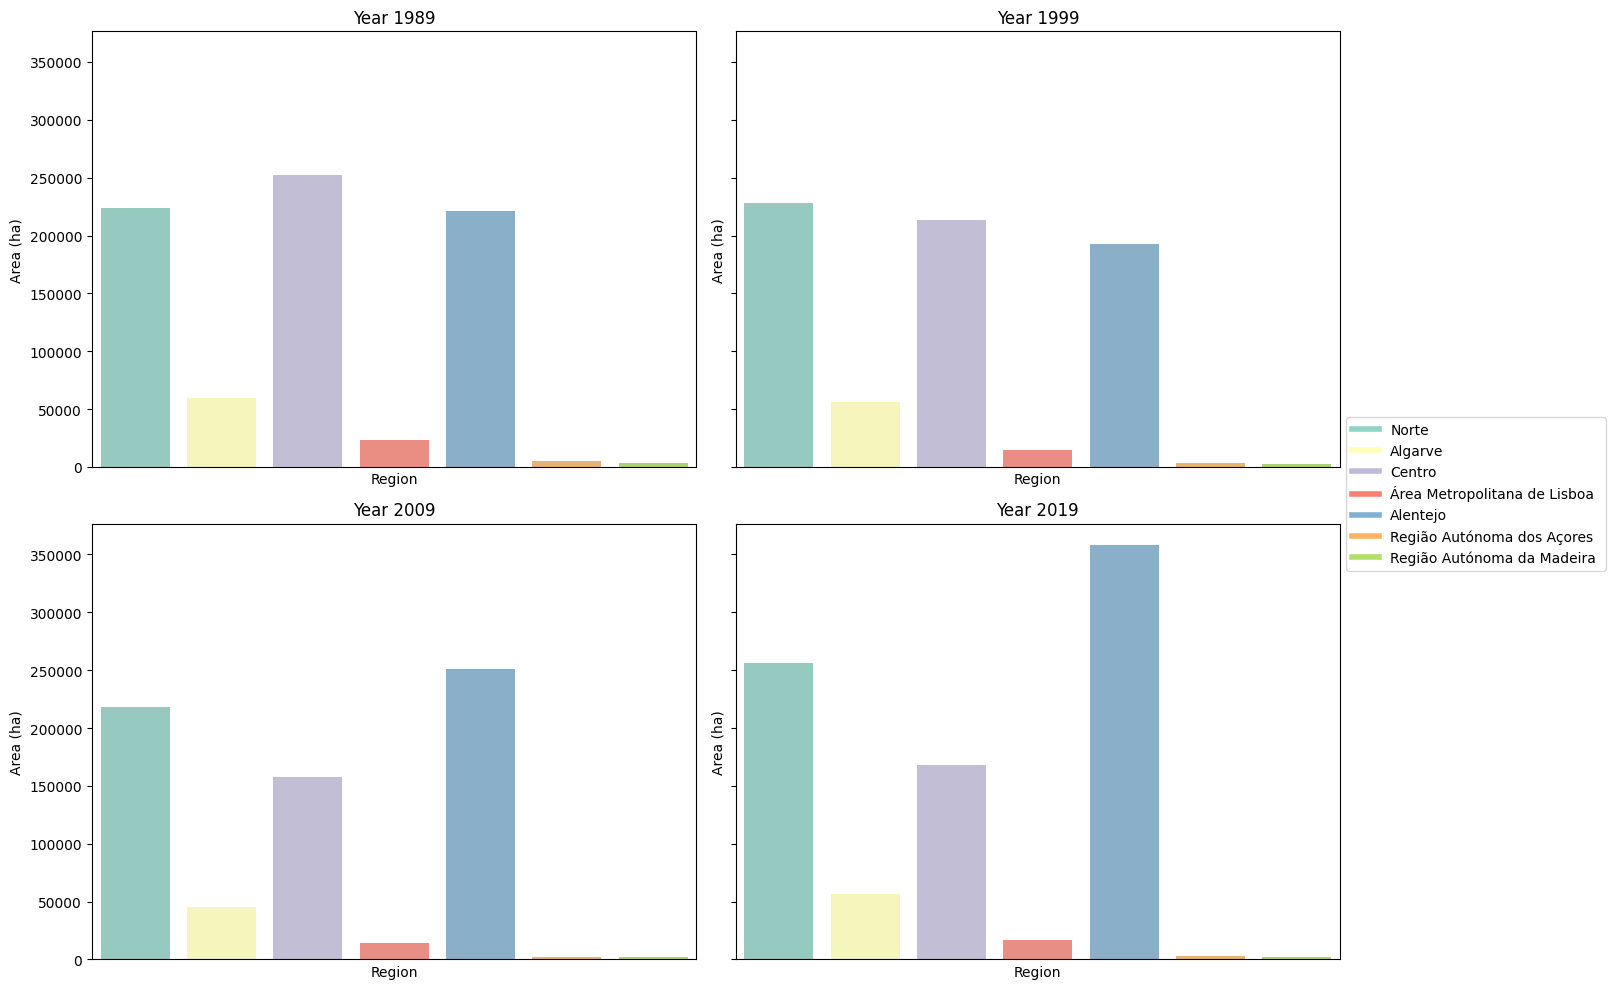

In [62]:
# Filtrar los datos por crop_name "Total"
df_filtered = df[df['crop_name'] == "Total"]

# Configurar el tamaño de la figura y crear subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharey=True)

# Crear una paleta de colores para las regiones
unique_regions = df_filtered['region_name'].unique()
palette = dict(zip(unique_regions, sns.color_palette('Set3', len(unique_regions))))

for ax, year in zip(axes.flatten(), df_filtered['year'].unique()):
    sns.barplot(x='region_name', y='area', data=df_filtered[df_filtered['year'] == year], palette=palette, ax=ax)
    ax.set_title(f'Year {year}')
    ax.set_xlabel('Region')
    ax.set_ylabel('Area (ha)')
    ax.set_xticks([])


# Añadir una leyenda fuera del bucle
handles = [plt.Line2D([0], [0], color=palette[region], lw=4) for region in unique_regions]
labels = unique_regions
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(0.84, 0.5))
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Ajustar el layout para dar espacio a la leyenda
plt.show()

c:\Users\cespe\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cespe\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


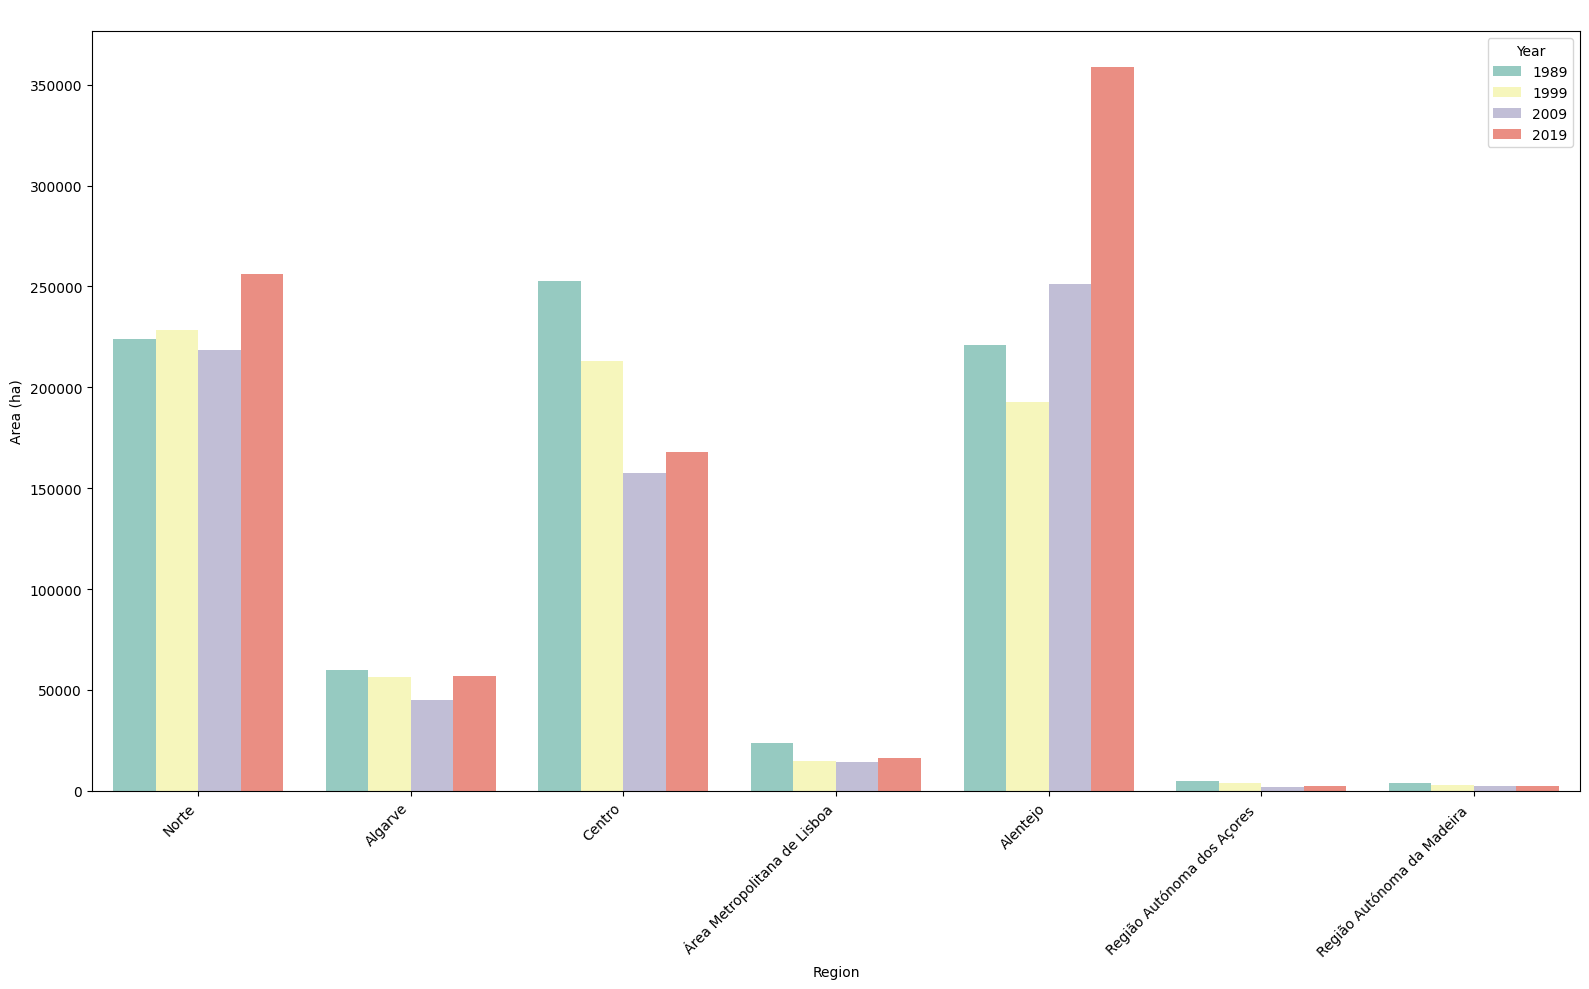

In [46]:
# Configurar el tamaño de la figura
plt.figure(figsize=(16, 10))

# Crear un gráfico de barras agrupadas
sns.barplot(x='region_name', y='area', hue='year', data=df_filtered, palette='Set3')
plt.title(' ')
plt.xlabel('Region')
plt.ylabel('Area (ha)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year', loc='upper right')

plt.tight_layout()
plt.show()


In [47]:
# See the dataframe filtered for the last cell plot
df_filtered.head(50)

,NutsID,year,area,permanent_crop_ID,crop_name,region_name,region_level
0,11,1989,223736,33,Total,Norte,NUTS2
1,11,1999,228323,34,Total,Norte,NUTS2
2,11,2009,218545,35,Total,Norte,NUTS2
3,11,2019,255954,36,Total,Norte,NUTS2
32,15,1989,59888,48705,Total,Algarve,NUTS2
33,15,1999,56309,48706,Total,Algarve,NUTS2
34,15,2009,45007,48707,Total,Algarve,NUTS2
35,15,2019,56754,48708,Total,Algarve,NUTS2
64,16,1989,252705,51425,Total,Centro,NUTS2
65,16,1999,213178,51426,Total,Centro,NUTS2


c:\Users\cespe\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cespe\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cespe\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


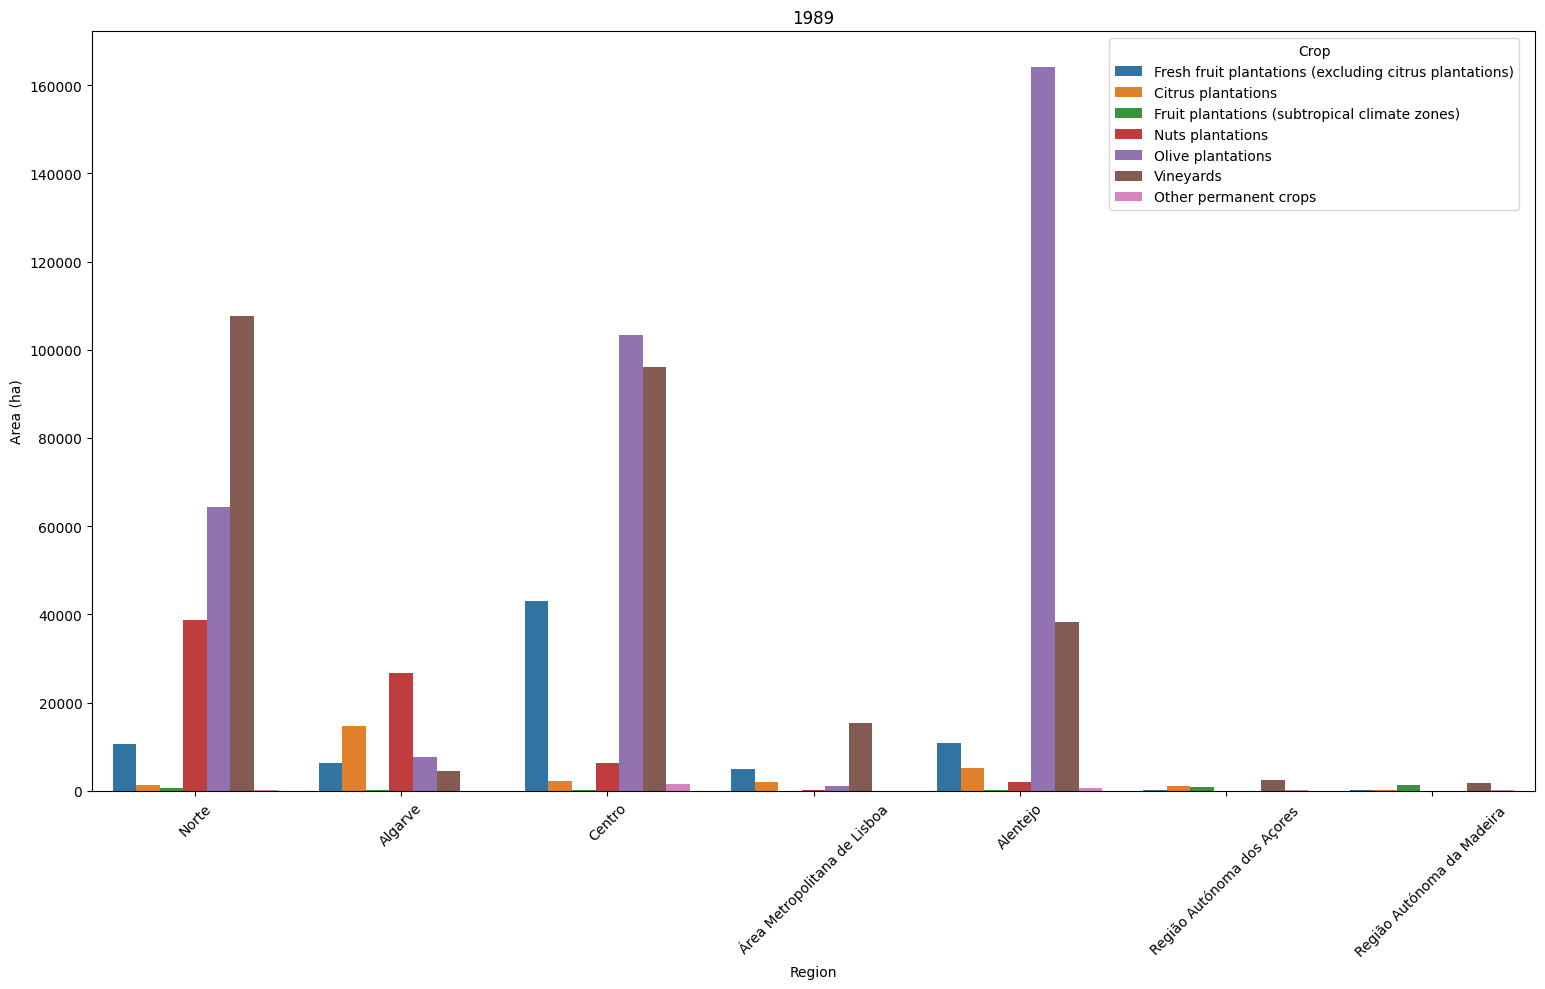

c:\Users\cespe\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cespe\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cespe\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


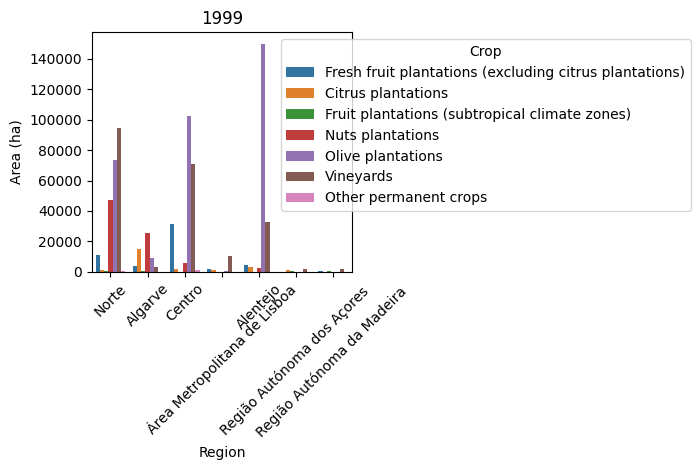

c:\Users\cespe\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cespe\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cespe\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


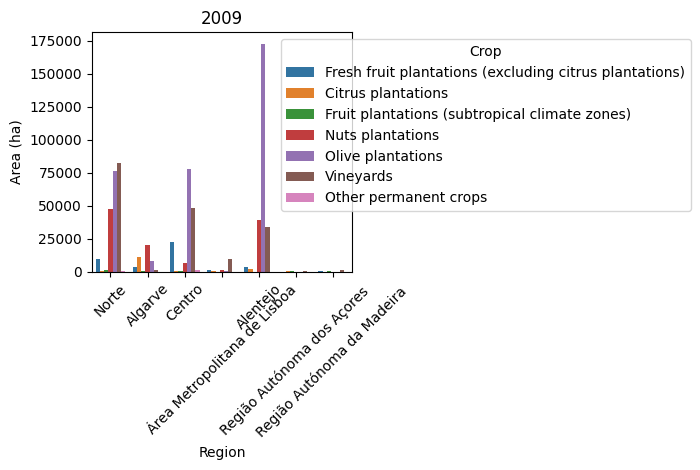

c:\Users\cespe\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cespe\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cespe\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


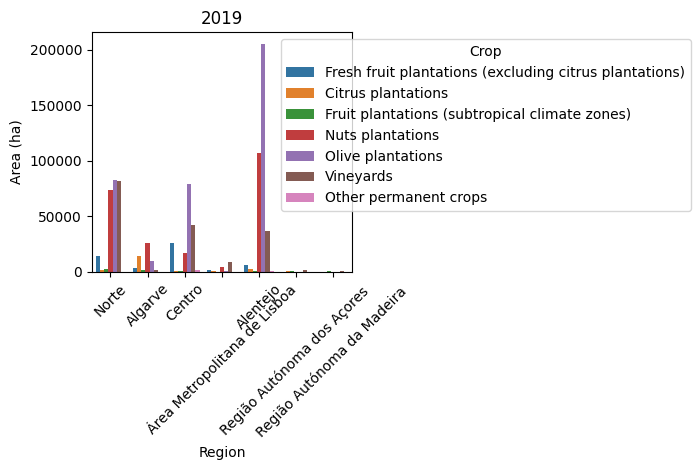

In [65]:
# Filter data for the year 1989 and exclude 'Total'
df_filtered_crop = df[(df['year'] == 1989) & (df['crop_name'] != "Total")]

# Set the size of the figure and create subplots
fig, ax = plt.subplots(figsize=(16, 10))

# Create a grouped bar plot by crop and region for the year 1989
sns.barplot(x='region_name', y='area', hue='crop_name', data=df_filtered_crop, ci=None)

# Set labels and title
ax.set_title('1989')
ax.set_xlabel('Region')
ax.set_ylabel('Area (ha)')
ax.legend(title='Crop', bbox_to_anchor=(0.7, 1), loc='upper left')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()